# Create a Neural Network Regression (NNR)

Creating a regression problem about Predicting a numerical variable base on other combination of variables
Features == Input / Independent
Labels == Output / Dependent

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

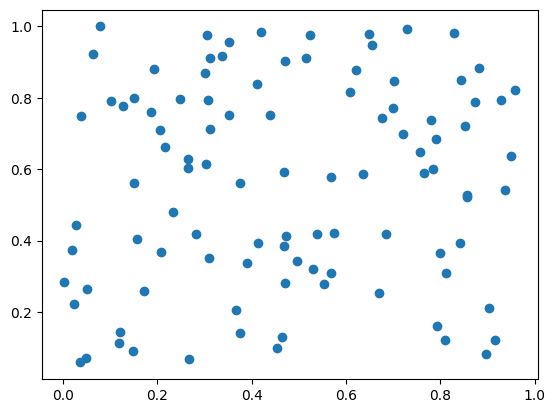

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#Create Features
X = np.random.rand(1,100)
Y = np.random.rand(1,100)
X = tf.squeeze(X)
Y = tf.squeeze(Y)
plt.scatter(X,Y)

## Input and Output Shapes

In [3]:
#Create a demo tensor for housing price prediction
house_info = tf.constant(["bedroom","bathroom","garage"])
hous_price = tf.constant([950000])

In [4]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

(TensorShape([16]), TensorShape([16]))

In [5]:
X[0].numpy(), Y[0].numpy()

(0.12514958197322235, 0.479082521977784)

## First Modelling with TensorFlow


1.   Creating the model (input & output)
2.   Compiling a Model : define the losst function (The function which tells our model how wrong it is), the optimize (tells our model how to improve the patterns) and evaluation metrics (what we can use to interpret the performance)
3.   Fit the modelling



In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 525ms/step - loss: 0.3259 - mae: 0.3259
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 0.3190 - mae: 0.3190
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 0.3122 - mae: 0.3122
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.3054 - mae: 0.3054
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 0.2985 - mae: 0.2985


In [22]:
X, Y

(<tf.Tensor: shape=(100,), dtype=float64, numpy=
 array([0.46890839, 0.26522081, 0.35230333, 0.30118561, 0.75781308,
        0.30947783, 0.03777963, 0.92805118, 0.18646341, 0.17184291,
        0.56788474, 0.41055247, 0.72127403, 0.91544524, 0.15718805,
        0.81224793, 0.02714805, 0.95846474, 0.06275531, 0.31185374,
        0.30478391, 0.62160452, 0.20680548, 0.93667125, 0.52916096,
        0.68529   , 0.07773216, 0.20804822, 0.37608125, 0.4957543 ,
        0.42004083, 0.81009869, 0.11994189, 0.35102488, 0.55403992,
        0.15158888, 0.78375693, 0.85119633, 0.56795937, 0.79205096,
        0.76566471, 0.05142554, 0.537993  , 0.51559168, 0.4392834 ,
        0.72853824, 0.78041189, 0.03535117, 0.89685899, 0.19406698,
        0.31095755, 0.65460649, 0.23354212, 0.70087119, 0.69858075,
        0.01841553, 0.24829417, 0.64804352, 0.94968423, 0.67556677,
        0.87405595, 0.04839157, 0.47286504, 0.37551654, 0.28250909,
        0.63671653, 0.15080582, 0.26589445, 0.00289522, 0.10287738,

In [8]:
model.predict([1.0])

1/1 [==============================] - 0s 96ms/step


array([[0.5682481]], dtype=float32)

## Improve the model
We can improve the creation, compile and the fitting by updating them
1. **Creating a model** - Add More layers, increase number of hidden units (neurons), change the activation function of each layer
2. **compiling a model** - here we might change the optimization function or perhapse the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fut a model for more **epochs** or on more data


In [25]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),

    tf.keras.layers.Dense(1)
])
#Adam(learning_rate=0.0001)
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.5796 - mae: 0.5796
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4793 - mae: 0.4793
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4070 - mae: 0.4070
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3552 - mae: 0.3552
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3257 - mae: 0.3257
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2945 - mae: 0.2945
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2746 - mae: 0.2746
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2649 - mae: 0.2649
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2577 - mae: 0.2577
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2523 - mae: 0.2523
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2524 

In [10]:
model.predict([1.0])

1/1 [==============================] - 0s 120ms/step


array([[0.6332085]], dtype=float32)

In [27]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [30]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

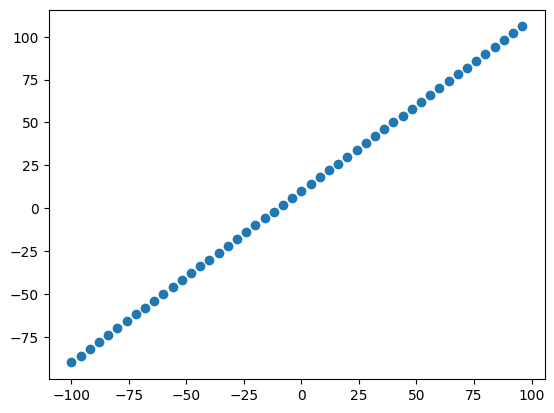

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X,Y)

### The three sets
* Training Set - The model learns from this data (70 - 80% of data)
* Validation Set -  The model gts tuned on this data, which is typically 10 - 15%
* Test Set - The model get evaluated on this data to test what it has learned


In [35]:
# Check the length of our data
len(X)

50

In [36]:
# Split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]
len(X_train), len(Y_train)

(40, 40)

#Visualising the data
Visualise the training and test data

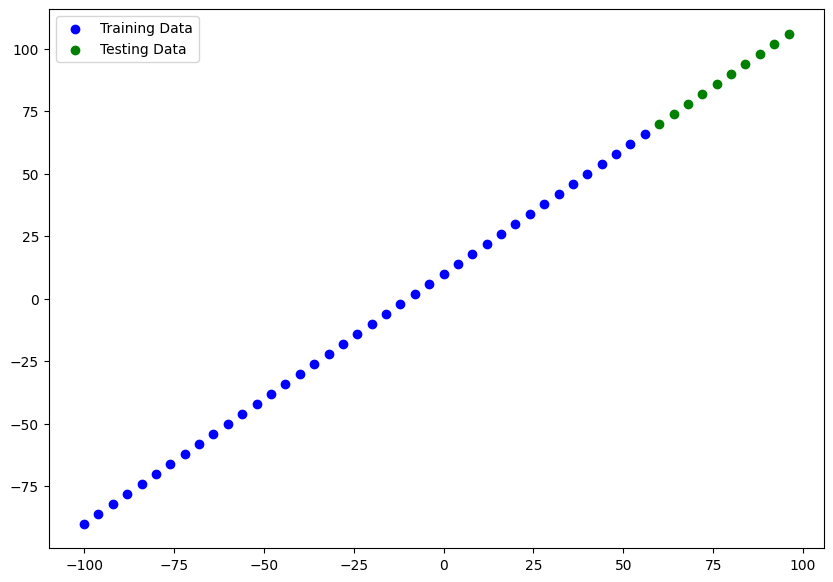

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train,c="b",label="Training Data")
plt.scatter(X_test,Y_test,c="g",label="Testing Data")
plt.legend()


In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(tf.expand_dims(X_train,axis=-1),Y_train)


In [40]:
# Visualizing the model
model.summary()

ValueError: ignored

In [123]:
# Let's create a model automatically in the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape =[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [86]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 10        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Total params: 2 (8.00 Byte) = Total Number of parameters

Trainable params: 2 (8.00 Byte) - These are the parameters (patterns) the model can update as it trains

Non-trainable params: 0 (0.00 Byte) - not updated during training when We bring already lmearn patterns or parameters from other models (transfer learning)

In [124]:
model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=200,verbose=1)

Epoch 1/200
2/2 [==============================] - 1s 11ms/step - loss: 68.3116 - mae: 68.3116
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 62.6346 - mae: 62.6346
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 57.1719 - mae: 57.1719
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 51.6113 - mae: 51.6113
Epoch 5/200
2/2 [==============================] - 0s 14ms/step - loss: 46.1749 - mae: 46.1749
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 40.6524 - mae: 40.6524
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 35.0376 - mae: 35.0376
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 29.2636 - mae: 29.2636
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 23.8672 - mae: 23.8672
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 18.6032 - mae: 18.6032
Epoch 11/200
2/2 [==============================] - 0s 7m

In [107]:
# Get a siùùary of our model
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


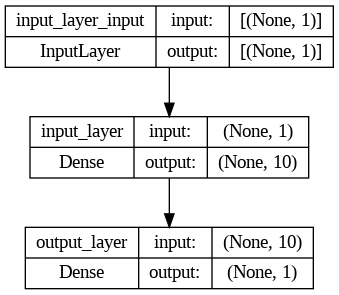

In [95]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualize prediction
To visualize we can have y_test vs y_pred (ground truth vs model's prediction)

In [126]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 21ms/step


array([[ 69.74105 ],
       [ 73.72205 ],
       [ 77.70304 ],
       [ 81.68403 ],
       [ 85.66504 ],
       [ 89.64604 ],
       [ 93.627045],
       [ 97.60804 ],
       [101.58902 ],
       [105.57002 ]], dtype=float32)

In [82]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [127]:
def plot_predictions(training_data=X_train,
                     training_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(training_data,training_labels,c="b",label="training data")
  plt.scatter(test_data,test_labels,c="g",label="testing data")
  plt.scatter(test_data,predictions,c="r",label="prediction data")

  plt.legend()



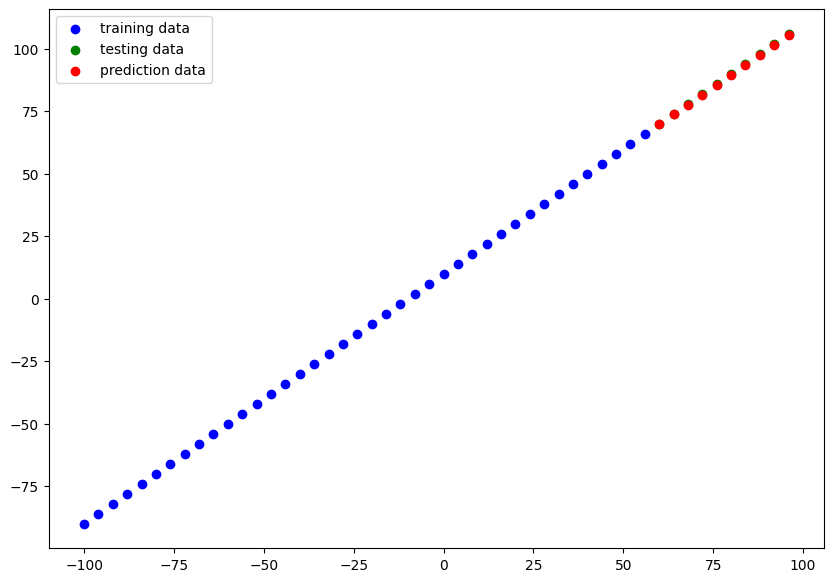

In [128]:
plot_predictions()

# Evaluation model with regression
Multiple ways to evaluate the model performance with metrics

* MAE - Mean Absolute Error; "On average, how wrong is each of my model's predictions"
* MSE Mean Scalar Error

# Experiments to improve the model
Build -> Fit -> Evaluate -> Tweak -> Fit -> Evaluate -> Tweak ...



In [134]:
def calculate_mae(test_data,prediction):
  return tf.metrics.mean_absolute_error(y_true=test_data,
                                        y_pred=tf.squeeze(prediction))

def calculate_mse(test_data,prediction):
  return tf.metrics.mean_squared_error(y_true=test_data,
                                        y_pred=tf.squeeze(prediction))

1/1 [==============================] - 0s 53ms/step
MAE =  tf.Tensor(23.304178, shape=(), dtype=float32)
MSE =  tf.Tensor(553.1708, shape=(), dtype=float32)


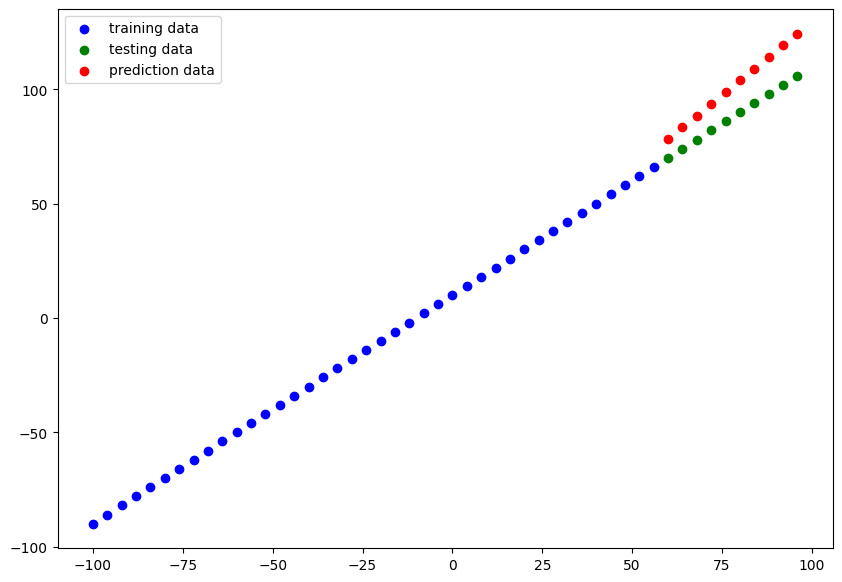

In [135]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_1.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100,verbose=0)
Y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_pred_1)
print("MAE = ", calculate_mae(X_test,Y_pred_1))
print("MSE = ",calculate_mse(X_test,Y_pred_1))

1/1 [==============================] - 0s 206ms/step
MAE =  tf.Tensor(65.740524, shape=(), dtype=float32)
MSE =  tf.Tensor(4418.1787, shape=(), dtype=float32)


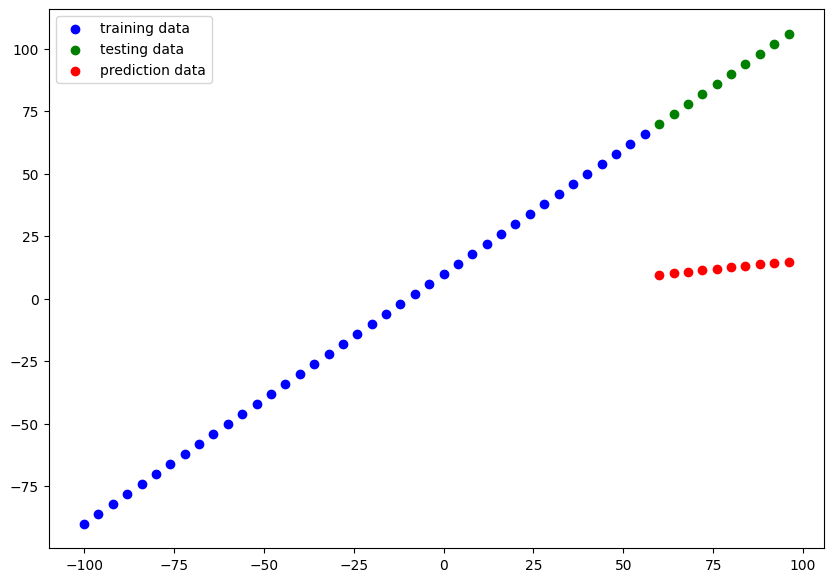

In [139]:
#Increase number of Hidden Layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100,verbose=0)
Y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_pred_2)
print("MAE = ", calculate_mae(X_test,Y_pred_2))
print("MSE = ",calculate_mse(X_test,Y_pred_2))

1/1 [==============================] - 0s 59ms/step
MAE =  tf.Tensor(69.7632, shape=(), dtype=float32)
MSE =  tf.Tensor(4979.665, shape=(), dtype=float32)


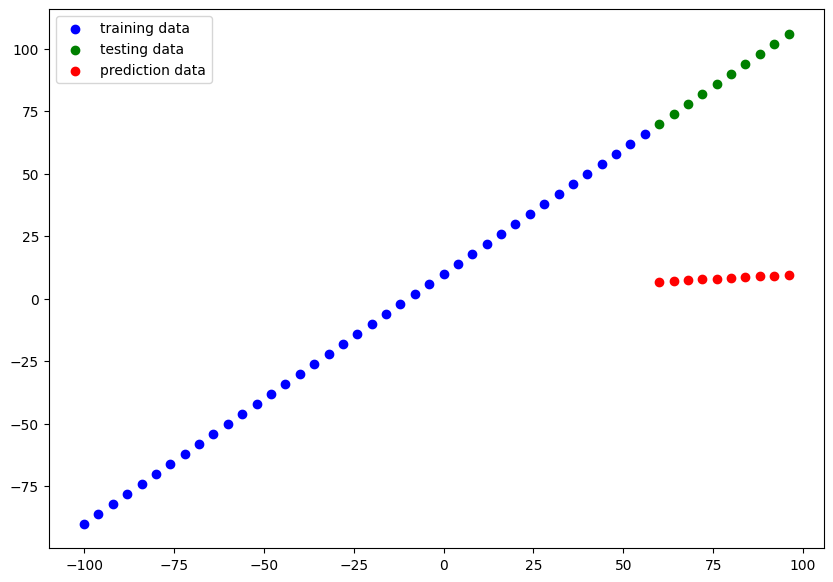

In [140]:
#Increase number of epochs
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=500,verbose=0)
Y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_pred_3)
print("MAE = ", calculate_mae(X_test,Y_pred_3))
print("MSE = ",calculate_mse(X_test,Y_pred_3))

1/1 [==============================] - 0s 52ms/step
MAE =  tf.Tensor(10.128834, shape=(), dtype=float32)
MSE =  tf.Tensor(102.59349, shape=(), dtype=float32)


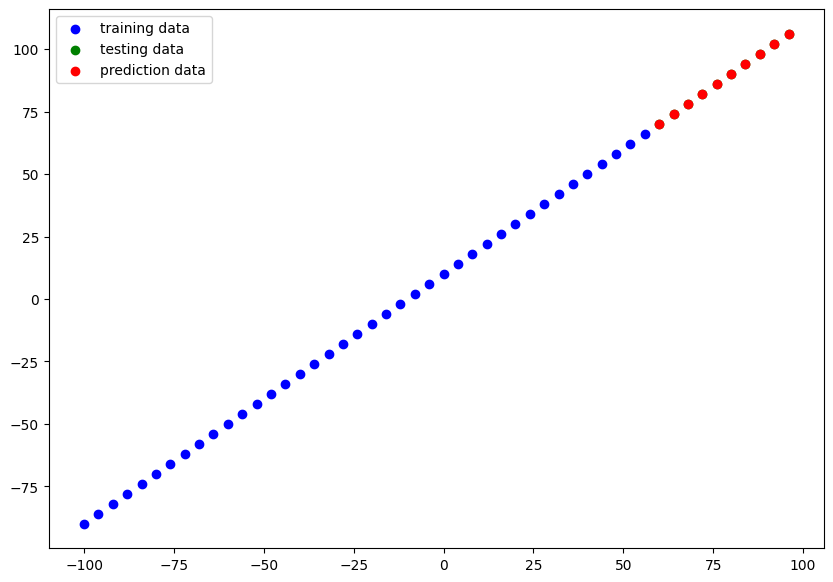

In [141]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape =[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model_4.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=200,verbose=0)
Y_pred_4 = model_4.predict(X_test)
plot_predictions(predictions=Y_pred_4)
print("MAE = ", calculate_mae(X_test,Y_pred_4))
print("MSE = ",calculate_mse(X_test,Y_pred_4))

# Save Models
Two main format
SavedModel
HDF5

In [142]:
model_4.save("best_model")

In [143]:
model_4.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [144]:
model_saved = tf.keras.models.load_model("best_model")
model_saved.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 5)                 10        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
preds = model_saved.predict(X_test)
Y_pred_4, preds

1/1 [==============================] - 0s 39ms/step


(array([[ 70.10552 ],
        [ 74.1107  ],
        [ 78.11588 ],
        [ 82.12107 ],
        [ 86.126236],
        [ 90.131424],
        [ 94.136604],
        [ 98.141785],
        [102.14696 ],
        [106.15215 ]], dtype=float32),
 array([[ 70.10552 ],
        [ 74.1107  ],
        [ 78.11588 ],
        [ 82.12107 ],
        [ 86.126236],
        [ 90.131424],
        [ 94.136604],
        [ 98.141785],
        [102.14696 ],
        [106.15215 ]], dtype=float32))